In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option("display.max_columns", 111)

In [27]:
data = pd.read_excel('dataset.xlsx')
data['SARS-Cov-2 exam result'] = data['SARS-Cov-2 exam result'].map(dict(negative=0, positive=1))
data.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in data.columns]
data['Urine___pH'] = data['Urine___pH'].map(lambda x: -100 if isinstance(x, str) else x).astype(float)
data['Urine___Leukocytes'] = data['Urine___Leukocytes'].map(lambda x: 500 if x == '<1000' else x).astype(float)







In [28]:
data.head()

,Patient_ID,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_addmited_to_regular_ward__1_yes__0_no_,Patient_addmited_to_semi_intensive_unit__1_yes__0_no_,Patient_addmited_to_intensive_care_unit__1_yes__0_no_,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_,Serum_Glucose,Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus_Enterovirus,Mycoplasma_pneumoniae,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Parainfluenza_2,Neutrophils,Urea,Proteina_C_reativa_mg_dL,Creatinine,Potassium,Sodium,Influenza_B__rapid_test,Influenza_A__rapid_test,Alanine_transaminase,Aspartate_transaminase,Gamma_glutamyltransferase_,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_phosphatase,Ionized_calcium_,Strepto_A,Magnesium,pCO2__venous_blood_gas_analysis_,Hb_saturation__venous_blood_gas_analysis_,Base_excess__venous_blood_gas_analysis_,pO2__venous_blood_gas_analysis_,Fio2__venous_blood_gas_analysis_,Total_CO2__venous_blood_gas_analysis_,pH__venous_blood_gas_analysis_,HCO3__venous_blood_gas_analysis_,Rods__,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine___Esterase,Urine___Aspect,Urine___pH,Urine___Hemoglobin,Urine___Bile_pigments,Urine___Ketone_Bodies,Urine___Nitrite,Urine___Density,Urine___Urobilinogen,Urine___Protein,Urine___Sugar,Urine___Leukocytes,Urine___Crystals,Urine___Red_blood_cells,Urine___Hyaline_cylinders,Urine___Granular_cylinders,Urine___Yeasts,Urine___Color,Partial_thromboplastin_time__PTT__,Relationship__Patient_Normal_,International_normalized_ratio__INR_,Lactic_Dehydrogenase,Prothrombin_time__PT___Activity,Vitamin_B12,Creatine_phosphokinase__CPK__,Ferritin,Arterial_Lactic_Acid,Lipase_dosage,D_Dimer,Albumin,Hb_saturation__arterial_blood_gases_,pCO2__arterial_blood_gas_analysis_,Base_excess__arterial_blood_gas_analysis_,pH__arterial_blood_gas_analysis_,Total_CO2__arterial_blood_gas_analysis_,HCO3__arterial_blood_gas_analysis_,pO2__arterial_blood_gas_analysis_,Arteiral_Fio2,Phosphor,ctO2__arterial_blood_gas_analysis_
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f

In [29]:
data.dtypes

Patient_ID                                                object
Patient_age_quantile                                       int64
SARS_Cov_2_exam_result                                     int64
Patient_addmited_to_regular_ward__1_yes__0_no_             int64
Patient_addmited_to_semi_intensive_unit__1_yes__0_no_      int64
Patient_addmited_to_intensive_care_unit__1_yes__0_no_      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean_platelet_volume_                                    float64
Red_blood_Cells                                          float64
Lymphocytes                                              float64
Mean_corpuscular_hemoglobin_concentration__MCHC_         float64
Leukocytes                                               float64
Basophils                                                float64
Mean_corpuscular_hemoglob

In [30]:
import autogluon as ag
from autogluon import TabularPrediction as task

- simples fato de ser não-nulo possui informação, não é nulo at random
- em que momento deve ser feita a previsão? após exames? após detecção? na admissão?
- sintomas relatados como features

In [31]:
a = data.select_dtypes(include=object)
for c in a.columns:
    v = a[c].value_counts()
    if v.shape[0] < 1000:
        print(v, a[c].dtype)
        print()

not_detected    1302
detected          52
Name: Respiratory_Syncytial_Virus, dtype: int64 object

not_detected    1336
detected          18
Name: Influenza_A, dtype: int64 object

not_detected    1277
detected          77
Name: Influenza_B, dtype: int64 object

not_detected    1349
detected           3
Name: Parainfluenza_1, dtype: int64 object

not_detected    1307
detected          45
Name: CoronavirusNL63, dtype: int64 object

not_detected    973
detected        379
Name: Rhinovirus_Enterovirus, dtype: int64 object

not_detected    1332
detected          20
Name: Coronavirus_HKU1, dtype: int64 object

not_detected    1342
detected          10
Name: Parainfluenza_3, dtype: int64 object

not_detected    1343
detected           9
Name: Chlamydophila_pneumoniae, dtype: int64 object

not_detected    1339
detected          13
Name: Adenovirus, dtype: int64 object

not_detected    1333
detected          19
Name: Parainfluenza_4, dtype: int64 object

not_detected    1343
detected           

In [32]:
label = 'SARS_Cov_2_exam_result'
ag_train = task.Dataset(df=data)
ag_train.head()

,Patient_ID,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_addmited_to_regular_ward__1_yes__0_no_,Patient_addmited_to_semi_intensive_unit__1_yes__0_no_,Patient_addmited_to_intensive_care_unit__1_yes__0_no_,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration__MCHC_,Leukocytes,Basophils,Mean_corpuscular_hemoglobin__MCH_,Eosinophils,Mean_corpuscular_volume__MCV_,Monocytes,Red_blood_cell_distribution_width__RDW_,Serum_Glucose,Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus_Enterovirus,Mycoplasma_pneumoniae,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Parainfluenza_2,Neutrophils,Urea,Proteina_C_reativa_mg_dL,Creatinine,Potassium,Sodium,Influenza_B__rapid_test,Influenza_A__rapid_test,Alanine_transaminase,Aspartate_transaminase,Gamma_glutamyltransferase_,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_phosphatase,Ionized_calcium_,Strepto_A,Magnesium,pCO2__venous_blood_gas_analysis_,Hb_saturation__venous_blood_gas_analysis_,Base_excess__venous_blood_gas_analysis_,pO2__venous_blood_gas_analysis_,Fio2__venous_blood_gas_analysis_,Total_CO2__venous_blood_gas_analysis_,pH__venous_blood_gas_analysis_,HCO3__venous_blood_gas_analysis_,Rods__,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine___Esterase,Urine___Aspect,Urine___pH,Urine___Hemoglobin,Urine___Bile_pigments,Urine___Ketone_Bodies,Urine___Nitrite,Urine___Density,Urine___Urobilinogen,Urine___Protein,Urine___Sugar,Urine___Leukocytes,Urine___Crystals,Urine___Red_blood_cells,Urine___Hyaline_cylinders,Urine___Granular_cylinders,Urine___Yeasts,Urine___Color,Partial_thromboplastin_time__PTT__,Relationship__Patient_Normal_,International_normalized_ratio__INR_,Lactic_Dehydrogenase,Prothrombin_time__PT___Activity,Vitamin_B12,Creatine_phosphokinase__CPK__,Ferritin,Arterial_Lactic_Acid,Lipase_dosage,D_Dimer,Albumin,Hb_saturation__arterial_blood_gases_,pCO2__arterial_blood_gas_analysis_,Base_excess__arterial_blood_gas_analysis_,pH__arterial_blood_gas_analysis_,Total_CO2__arterial_blood_gas_analysis_,HCO3__arterial_blood_gas_analysis_,pO2__arterial_blood_gas_analysis_,Arteiral_Fio2,Phosphor,ctO2__arterial_blood_gas_analysis_
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score

Beginning AutoGluon training ...
AutoGluon will save models to models/
Train Data Rows:    2822
Train Data Columns: 111
Preprocessing data ...
Here are the first 10 unique label values in your data:  [0 1]
AutoGluon infers your prediction problem is: binary  (because only two unique label-values observed)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Feature Generator processed 2822 data points with 103 features
Original Features:
	object features: 33
	int features: 4
	float features: 66
Generated Features:
	int features: 0
All Features:
	object features: 33
	int features: 4
	float features: 66
	Data preprocessing and feature engineering runtime = 0.35s ...
AutoGluon will gauge predictive performance using evaluation metric: roc_auc
This metric expects predicted probabilities rather than predicted class labels, so you

Finished Task with config: {'feature_fraction': 1.0, 'learning_rate': 0.1, 'min_data_in_leaf': 20, 'num_leaves': 31} and reward: 0.6831069157260347
Finished Task with config: {'feature_fraction': 0.849287521202112, 'learning_rate': 0.11600278744074129, 'min_data_in_leaf': 23, 'num_leaves': 51} and reward: 0.649560483468185
Finished Task with config: {'feature_fraction': 0.9832303624547367, 'learning_rate': 0.1830666866893767, 'min_data_in_leaf': 20, 'num_leaves': 40} and reward: 0.6730346618719409
Finished Task with config: {'feature_fraction': 0.7678781462874831, 'learning_rate': 0.10967292513343051, 'min_data_in_leaf': 9, 'num_leaves': 71} and reward: 0.6793998823516354
Finished Task with config: {'feature_fraction': 0.9793937631892887, 'learning_rate': 0.008937301829382021, 'min_data_in_leaf': 15, 'num_leaves': 31} and reward: 0.6802378494766868
Finished Task with config: {'feature_fraction': 0.8547839075585418, 'learning_rate': 0.0436441139494493, 'min_data_in_leaf': 7, 'num_leaves

Finished Task with config: {'depth': 6, 'l2_leaf_reg': 3.0, 'learning_rate': 0.1} and reward: 0.6886896635922708
Finished Task with config: {'depth': 7, 'l2_leaf_reg': 1.4400636612022004, 'learning_rate': 0.057970460196156676} and reward: 0.6841141411114441
Finished Task with config: {'depth': 6, 'l2_leaf_reg': 4.219992636699372, 'learning_rate': 0.05699136517687422} and reward: 0.691972163952985
Finished Task with config: {'depth': 8, 'l2_leaf_reg': 4.053860192315023, 'learning_rate': 0.05549069781147969} and reward: 0.6961176039689675
Finished Task with config: {'depth': 7, 'l2_leaf_reg': 4.45208247938962, 'learning_rate': 0.005445439567083334} and reward: 0.6398766911952407
Finished Task with config: {'depth': 5, 'l2_leaf_reg': 4.970203398759228, 'learning_rate': 0.044772492644670696} and reward: 0.693306806956792
Finished Task with config: {'depth': 6, 'l2_leaf_reg': 1.760755980699039, 'learning_rate': 0.04833963779843774} and reward: 0.6863783171844305
Finished Task with config: {

Finished Task with config: {'activation.choice': 0, 'dropout_prob': 0.1, 'embedding_size_factor': 1.0, 'layers.choice': 0, 'learning_rate': 0.0003, 'network_type.choice': 0, 'use_batchnorm.choice': 0, 'weight_decay': 1e-06} and reward: 0.5730141289026516
Finished Task with config: {'activation.choice': 1, 'dropout_prob': 0.15997881372054285, 'embedding_size_factor': 1.401218157177523, 'layers.choice': 1, 'learning_rate': 0.00017947939692631345, 'network_type.choice': 1, 'use_batchnorm.choice': 1, 'weight_decay': 5.08817855727774e-05} and reward: 0.6183864415809277
Finished Task with config: {'activation.choice': 0, 'dropout_prob': 0.32591255290309884, 'embedding_size_factor': 1.0141677649657033, 'layers.choice': 4, 'learning_rate': 0.00012403381694500644, 'network_type.choice': 1, 'use_batchnorm.choice': 1, 'weight_decay': 6.900767801543656e-10} and reward: 0.6101677044140335
Finished Task with config: {'activation.choice': 0, 'dropout_prob': 0.08729731173930688, 'embedding_size_factor

0.658799229967113



Feature Generator processed 2822 data points with 104 features
Original Features:
	object features: 34
	int features: 4
	float features: 66
Generated Features:
	int features: 0
All Features:
	object features: 34
	int features: 4
	float features: 66
	Data preprocessing and feature engineering runtime = 0.39s ...
AutoGluon will gauge predictive performance using evaluation metric: roc_auc
This metric expects predicted probabilities rather than predicted class labels, so you'll need to use predict_proba() instead of predict()
To change this, specify the eval_metric argument of fit()
AutoGluon will early stop models using evaluation metric: roc_auc
	0.63s	 = Training runtime
	0.13s	 = Validation runtime
	0.64s	 = Training runtime
	0.14s	 = Validation runtime
	0.63s	 = Training runtime
	0.14s	 = Validation runtime
	0.63s	 = Training runtime
	0.14s	 = Validation runtime
	0.03s	 = Training runtime
	0.13s	 = Validation runtime
	0.03s	 = Training runtime
	0.13s	 = Validation runtime
Starting Ex

Finished Task with config: {'feature_fraction': 1.0, 'learning_rate': 0.1, 'min_data_in_leaf': 20, 'num_leaves': 31} and reward: 0.6165075800112296
Finished Task with config: {'feature_fraction': 0.9952776439366309, 'learning_rate': 0.09193807782421308, 'min_data_in_leaf': 12, 'num_leaves': 34} and reward: 0.6262533087350606
Finished Task with config: {'feature_fraction': 0.7733145548578142, 'learning_rate': 0.0066194543965620006, 'min_data_in_leaf': 7, 'num_leaves': 92} and reward: 0.6325470671143247
Finished Task with config: {'feature_fraction': 0.8902933219579052, 'learning_rate': 0.024291718077368716, 'min_data_in_leaf': 15, 'num_leaves': 38} and reward: 0.6199538209444362
Finished Task with config: {'feature_fraction': 0.8223087340609019, 'learning_rate': 0.0987588772184711, 'min_data_in_leaf': 18, 'num_leaves': 96} and reward: 0.620197320927248
Finished Task with config: {'feature_fraction': 0.9944380369421116, 'learning_rate': 0.0637589604067412, 'min_data_in_leaf': 23, 'num_le

Finished Task with config: {'depth': 6, 'l2_leaf_reg': 3.0, 'learning_rate': 0.1} and reward: 0.6857417868888152
Finished Task with config: {'depth': 5, 'l2_leaf_reg': 2.992364684289436, 'learning_rate': 0.02161803259672399} and reward: 0.6740852994763319
Finished Task with config: {'depth': 6, 'l2_leaf_reg': 3.6322370469875582, 'learning_rate': 0.014717651486128188} and reward: 0.6768096345781436
Finished Task with config: {'depth': 7, 'l2_leaf_reg': 2.7268009097244836, 'learning_rate': 0.16308877992289872} and reward: 0.6796227755560393
Finished Task with config: {'depth': 8, 'l2_leaf_reg': 2.0787493115063533, 'learning_rate': 0.050109185080670596} and reward: 0.6764973816590084
Finished Task with config: {'depth': 7, 'l2_leaf_reg': 2.6778186516554503, 'learning_rate': 0.005040838614386712} and reward: 0.6501077129335732
Finished Task with config: {'depth': 7, 'l2_leaf_reg': 4.087595312977802, 'learning_rate': 0.058585126029232285} and reward: 0.6832666811811755
Finished Task with co

0.6687130267816512

[0.658799229967113, 0.6687130267816512] 0.6637561283743821


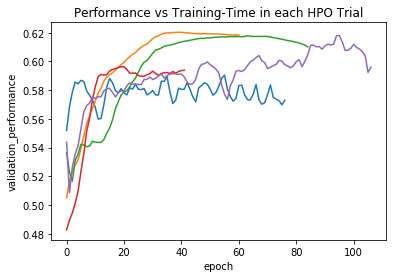

In [55]:
kf = KFold(2, shuffle=True, random_state=0)
aucs = []
for tr, ts in kf.split(data):
    ag_train = task.Dataset(df=data.iloc[tr])
    mdl = task.fit(train_data=ag_train, label=label, output_directory='models', auto_stack=False, 
               hyperparameter_tune=True, eval_metric='roc_auc', stopping_metric='roc_auc', num_bagging_folds=2,  
               feature_prune=False)
    
    p = mdl.predict_proba(data.iloc[ts])
    
    auc = roc_auc_score(data.iloc[ts][label], p)
    #cr = classification_report(data.iloc[ts][label], p > 0.8)
    
    aucs.append(auc)
    
    print(auc)
    #print(cr)
    print()

print(aucs, np.mean(aucs))





In [ ]:
# [0.66576762653405, 0.6575523868189437] 0.6616600066764968

In [54]:
print(classification_report(data.iloc[ts][label], p > 0.05))

              precision    recall  f1-score   support

           0       1.00      0.14      0.24      2538
           1       0.11      1.00      0.20       284

    accuracy                           0.22      2822
   macro avg       0.56      0.57      0.22      2822
weighted avg       0.91      0.22      0.23      2822

